In [1]:
data=open('Alice-in-wonderland.txt','r')
raw=data.readlines()
story=raw[127:5405]
story=story[39:]

In [2]:
import re
r1=re.findall(r"\n\n[ A-Z]+\n",''.join(story))
# print(r1)
character_entry_order=list()
for ele in r1:
    dat=ele.strip(" \n")
    if(dat.startswith("SCENE") or dat.startswith("ACT")):
        pass
    else:
        character_entry_order.append(dat)
unique_characters=list(set(character_entry_order))

In [3]:
unique_characters

['COURT',
 'JURY',
 'DUCHESS',
 'DUM',
 'KNAVE',
 'CAT',
 'RABBIT',
 'JURORS',
 'GRYPHON',
 'HATTER',
 'CATERPILLAR',
 'KING',
 'HUMPTY DUMPTY',
 'MOCK TURTLE',
 'DEE',
 'ONE JUROR',
 'QUEEN OF HEARTS',
 'CARROLL',
 'MARCH HARE',
 'QUEEN',
 'JABBERWOCKY',
 'OTHERS',
 'FROG',
 'RED QUEEN',
 'CURTAIN',
 'DORMOUSE',
 'WHITE QUEEN',
 'ALL THE GARDENERS',
 'EVERYBODY',
 'ALICE',
 'BOTH QUEENS',
 'WHITE RABBIT']

In [4]:
unique_characters_processed=list()
for ele in unique_characters:
    unique_characters_processed.append(ele.lower())

In [5]:
story_processed=list()
for ele in story:
    story_processed.append(ele.strip("\n").lower())
# story_processed=re.sub(r"\[[^\]]*\]",r'__',''.join(story_processed))
print(story_processed)

['act i', '', '', 'scene one', '', "_alice's home. lewis carroll is discovered, playing chess. golden-haired", 'alice, in a little blue dress, a black kitten in her arms, stands watching', 'him._', '', '', 'alice', '', "that's a funny game, uncle. what did you do then?", '', '', 'carroll', '', 'a red pawn took a white pawn; this way. you see, alice, the chessboard is', 'divided into sixty-four squares, red and white, and the white army tries', "to win and the red army tries to win. it's like a battle!", '', '', 'alice', '', 'with soldiers?', '', '', 'carroll', '', "yes, here are the kings and queens they are fighting for. that's the red", "queen and here's the white queen.", '', '', 'alice', '', 'how funny they look!', '', '', 'carroll', '', 'see the crowns on their heads, and look at their big feet.', '', '', 'alice', '', "it's a foot apiece, that's what it is! do they hump along like this?", '', '', 'carroll', '', "here! you're spoiling the game. i must keep them all in their right",

In [6]:
expression='|'.join(unique_characters_processed)
expression='('+expression+')+'

In [7]:
data=re.findall(expression,' '.join(story_processed))

In [56]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 
 
text_data = [data]
 
# Create one list using many lists
data = list(itertools.chain.from_iterable(text_data))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)

In [57]:
data_matrix

,queen of hearts,curtain,frog,gryphon,dum,jurors,knave,jury,white rabbit,duchess,...,others,march hare,one juror,white queen,all the gardeners,rabbit,red queen,cat,king,humpty dumpty
queen of hearts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0
curtain,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
frog,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0
gryphon,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
dum,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jurors,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
knave,3.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
jury,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
white rabbit,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0
duchess,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0


In [58]:
#pre-processing the matrix
edge_list=list()
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        if(data_matrix.iloc[i,j]>0 and i!=j):
            edge_list.append((data_matrix.columns[i],data_matrix.columns[j],{"weight":data_matrix.iloc[i,j]}))
            
# edge_list=list(set(edge_list)) 
edge_list

[('queen of hearts', 'white rabbit', {'weight': 1.0}),
 ('queen of hearts', 'duchess', {'weight': 1.0}),
 ('queen of hearts', 'mock turtle', {'weight': 1.0}),
 ('queen of hearts', 'hatter', {'weight': 2.0}),
 ('queen of hearts', 'white queen', {'weight': 1.0}),
 ('queen of hearts', 'king', {'weight': 3.0}),
 ('curtain', 'queen', {'weight': 1.0}),
 ('curtain', 'alice', {'weight': 4.0}),
 ('curtain', 'march hare', {'weight': 1.0}),
 ('frog', 'white rabbit', {'weight': 1.0}),
 ('frog', 'duchess', {'weight': 6.0}),
 ('frog', 'queen', {'weight': 3.0}),
 ('frog', 'alice', {'weight': 12.0}),
 ('frog', 'dormouse', {'weight': 1.0}),
 ('frog', 'rabbit', {'weight': 1.0}),
 ('frog', 'cat', {'weight': 2.0}),
 ('frog', 'king', {'weight': 1.0}),
 ('gryphon', 'curtain', {'weight': 1.0}),
 ('gryphon', 'dee', {'weight': 2.0}),
 ('gryphon', 'queen', {'weight': 1.0}),
 ('gryphon', 'mock turtle', {'weight': 19.0}),
 ('gryphon', 'alice', {'weight': 8.0}),
 ('gryphon', 'cat', {'weight': 1.0}),
 ('gryphon', '

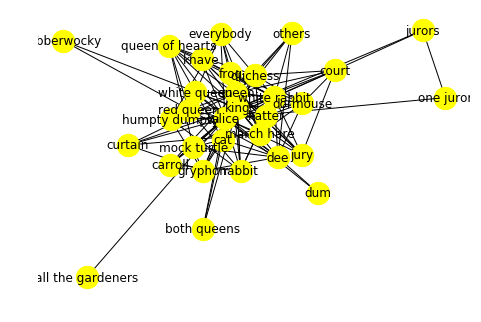

In [59]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, node_size=500, node_color='yellow', with_labels=True)